In [1]:
#Prédire le taux de rendement d'un bond en fonction de certaisn parametres
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Simuler des données pour l'exemple
np.random.seed(0)
dates = pd.date_range('2000-01-01', periods=240, freq='M')
inflation = np.random.normal(2, 0.5, len(dates))
unemployment = np.random.normal(5, 1, len(dates))
fed_funds_rate = np.random.normal(1.5, 0.5, len(dates))
bond_yield = 0.5 * inflation + 0.2 * unemployment + 0.3 * fed_funds_rate + np.random.normal(0, 0.2, len(dates))

data = pd.DataFrame({
    'Date': dates,
    'Inflation': inflation,
    'Unemployment': unemployment,
    'FedFundsRate': fed_funds_rate,
    'BondYield': bond_yield
})

data.set_index('Date', inplace=True)
print(data.head())


            Inflation  Unemployment  FedFundsRate  BondYield
Date                                                        
2000-01-31   2.882026      4.362563      1.885703   2.801862
2000-02-29   2.200079      4.602728      2.014719   2.522942
2000-03-31   2.489369      4.867119      1.045618   2.568579
2000-04-30   3.120447      4.702209      1.287841   2.809920
2000-05-31   2.933779      4.690987      1.931298   2.664109


In [3]:
# Diviser les données en caractéristiques (X) et cible (y)
X = data[['Inflation', 'Unemployment', 'FedFundsRate']] #p=3
y = data['BondYield']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [5]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.032858563598869954
R^2 Score: 0.7542369507254141


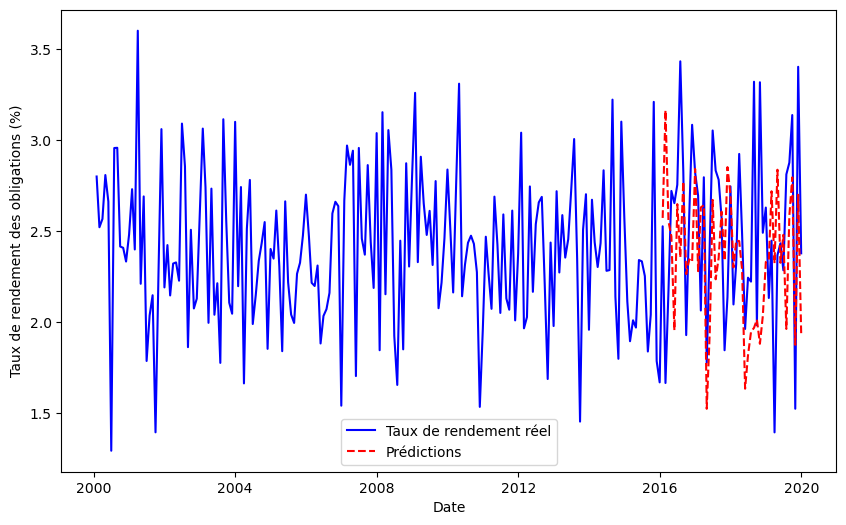

In [6]:
# Visualiser les résultats
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['BondYield'], label='Taux de rendement réel', color='blue')
plt.plot(data.index[-len(y_test):], y_pred, label='Prédictions', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Taux de rendement des obligations (%)')
plt.legend()
plt.show()


In [7]:
#Et à présent, vu que ca colle bien, je peux évaluer la valeur du taux en utilisant le modele de regression:
# Supposons que nous avons les valeurs des caractéristiques pour le jour actuel
today_inflation = 2.1
today_unemployment = 5.2
today_fed_funds_rate = 1.6

# Créer un DataFrame avec les valeurs des caractéristiques pour le jour actuel
new_data = pd.DataFrame({
    'Inflation': [today_inflation],
    'Unemployment': [today_unemployment],
    'FedFundsRate': [today_fed_funds_rate]
})

# Utiliser le modèle de régression linéaire pour prédire le prix de l'action le lendemain
predicted_stock_price_tomorrow = model.predict(new_data)

print(f'Prix de l\'action prédit pour le lendemain : {predicted_stock_price_tomorrow[0]:.2f}')


Prix de l'action prédit pour le lendemain : 2.57


In [10]:
#print(X_test)
#print(new_data)
print(predicted_stock_price_tomorrow)

[2.5696966]
